# 1. Imports & Helper Functions

In [9]:
!pip install UpSetPlot==0.6.0
!pip install sweetviz
!pip install lazypredict
!pip install sketch
!pip install ipython-autotime &> /dev/null
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

The syntax of the command is incorrect.


Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple
time: 28.7 s (started: 2024-02-16 20:43:42 +00:00)


In [10]:
# connect drive
#from google.colab import drive
import pandas as pd
import os
import warnings
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler
import seaborn as sns
import numpy as np
#from google.colab import files
import matplotlib.pyplot as plt
import random
import sketch
%load_ext autotime
warnings.filterwarnings('ignore')

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2024-02-16 20:44:10 +00:00)


In [11]:
df = pd.read_csv('synthetic_churn.csv')

df.head(50)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,49,No,No,No,0,Yes,One Year,Paper Check,21,703
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,51,No,No,No,0,No,One Year,Direct Debit,28,1720
5,9152-DEPY,No,17,68,120.7,0.0,0.0,No,no,0.0,...,23,Yes,No,No,0,No,Two Year,Credit Card,9,156
6,1958-SDSO,No,57,428,849.2,0.0,0.0,No,no,0.0,...,38,No,No,No,0,Yes,One Year,Credit Card,47,2671
7,8787-QZUC,No,25,54,203.7,0.0,0.0,No,no,0.0,...,29,Yes,No,No,0,Yes,Month-to-Month,Direct Debit,47,1197
8,7768-OQJE,No,70,171,627.4,0.0,0.0,No,no,0.0,...,47,No,No,No,0,Yes,Two Year,Credit Card,52,3593
9,7716-RHEB,No,50,206,445.8,0.0,0.0,No,no,0.0,...,61,No,No,No,0,No,One Year,Paper Check,11,539


time: 63 ms (started: 2024-02-16 20:44:11 +00:00)


In [12]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Monthly Charge,Total Charges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,32.337820,130.974129,322.752864,51.097524,130.070624,33.641783,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,24.595689,121.893966,288.619931,103.592369,243.527828,76.346828,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,55.000000,199.000000,498.050000,52.000000,140.400000,16.400000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,77.000000,918.000000,1234.200000,1120.000000,1372.500000,585.800000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


time: 63 ms (started: 2024-02-16 20:44:11 +00:00)


                                             |          | [  0%]   00:00 -> (? left)


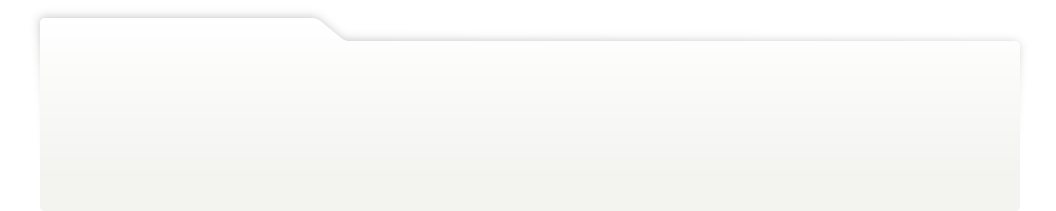
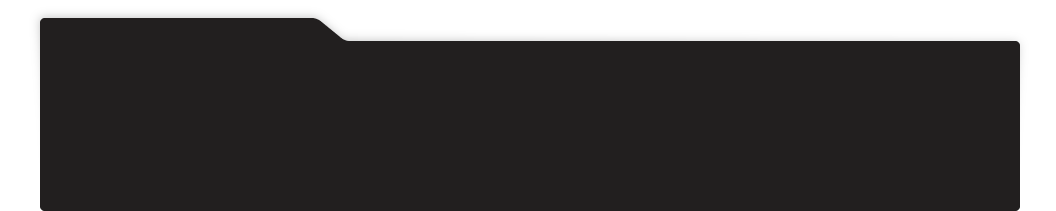
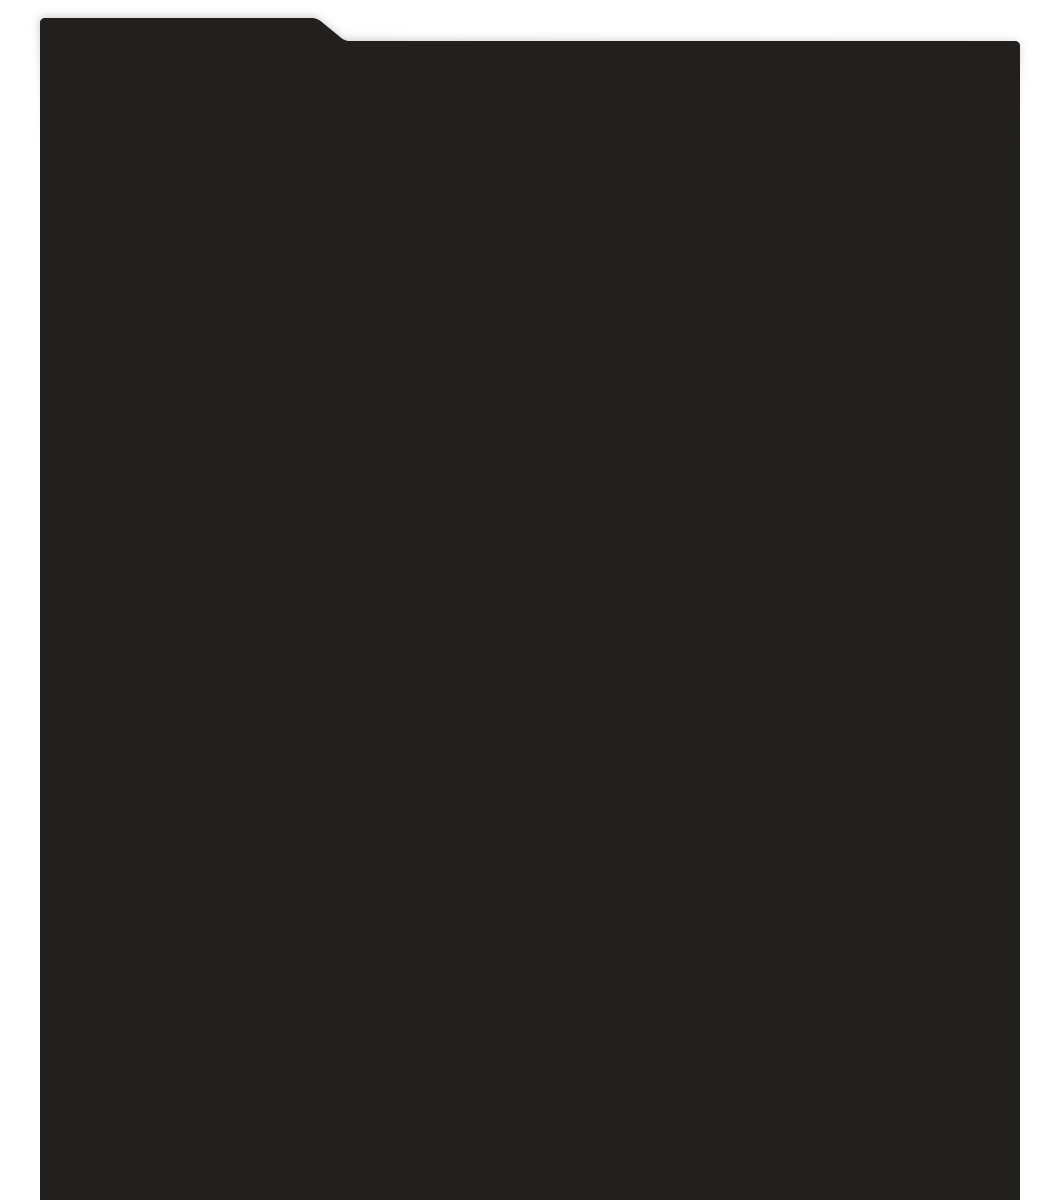
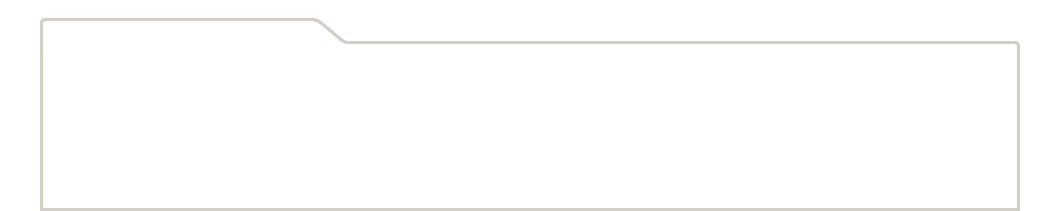
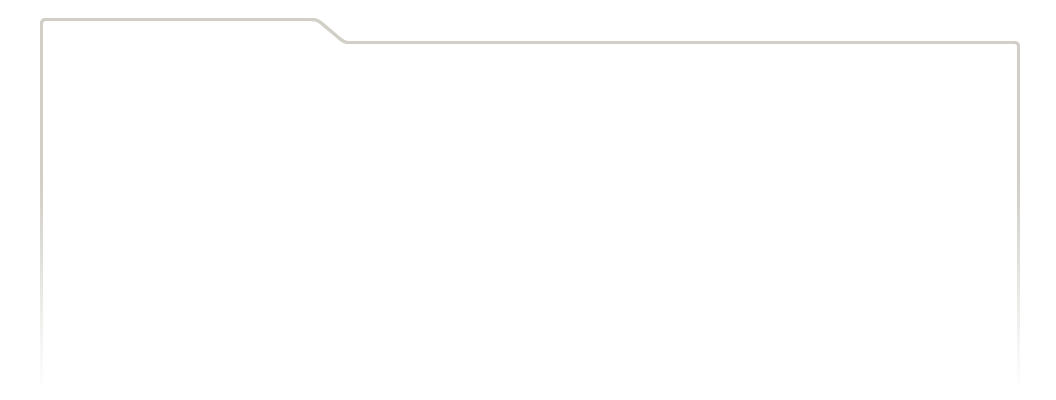
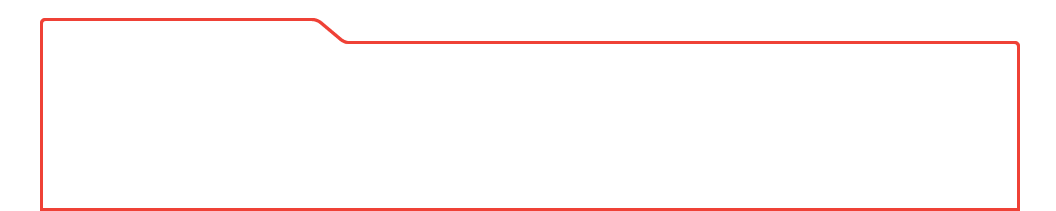
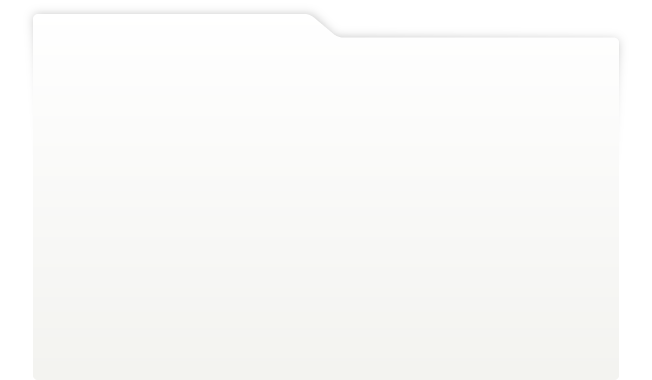
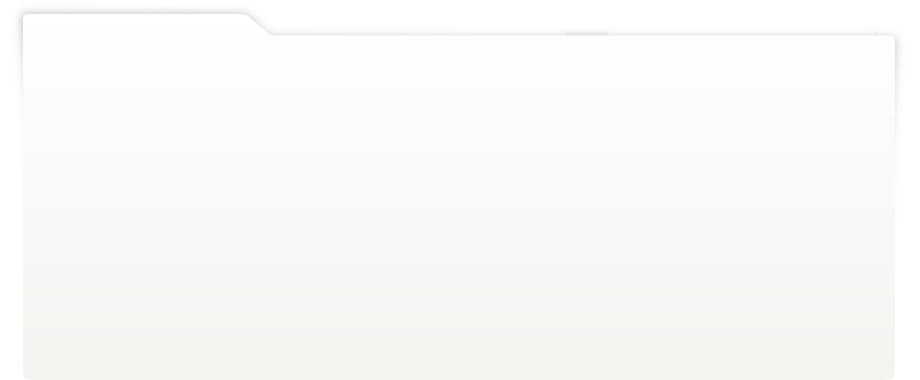
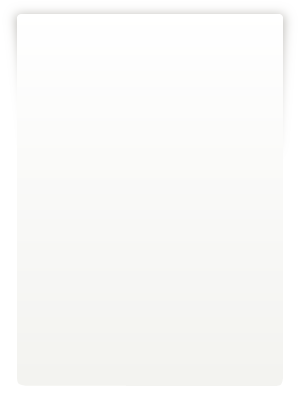
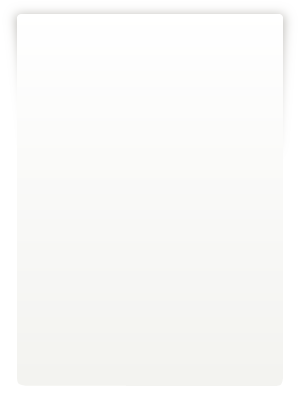
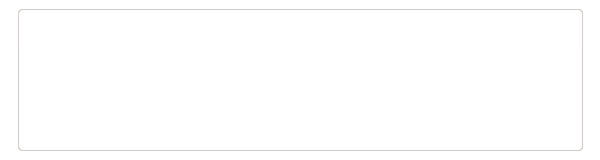
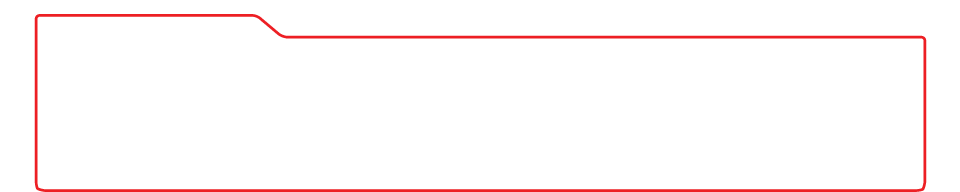
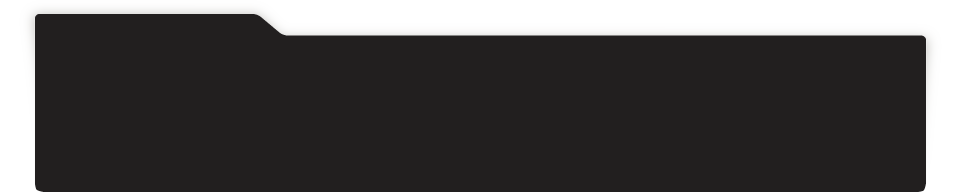
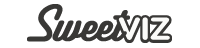
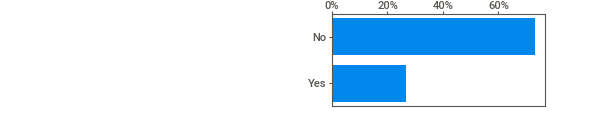
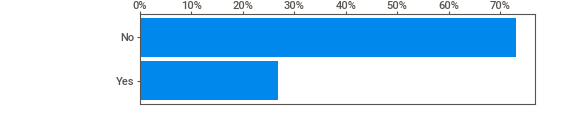
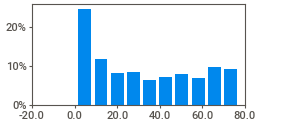
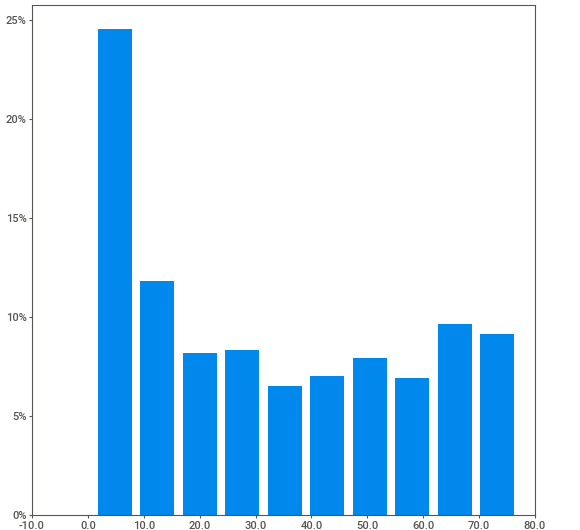
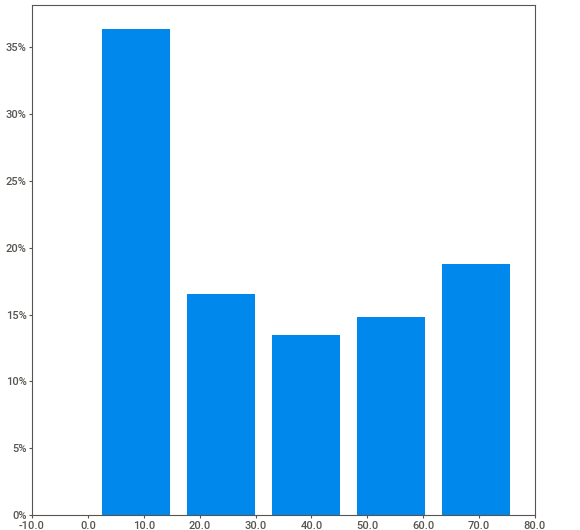
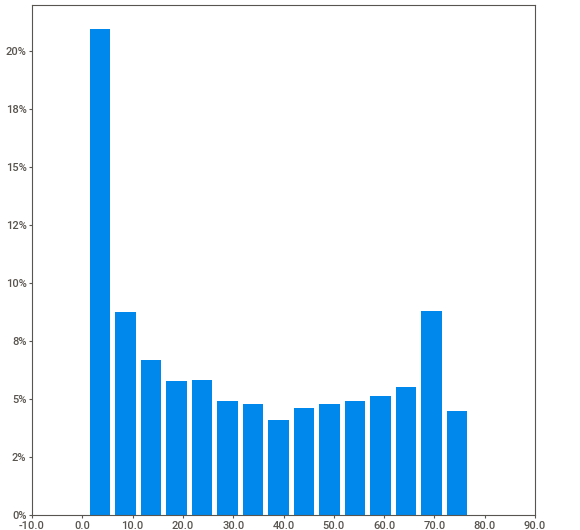
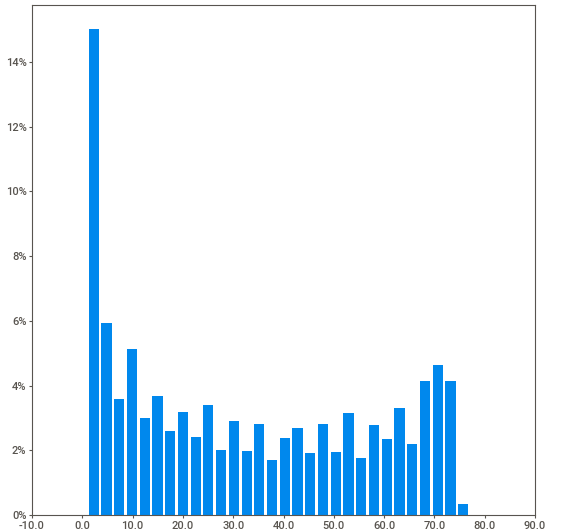
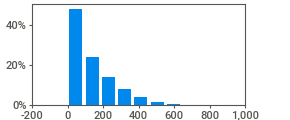
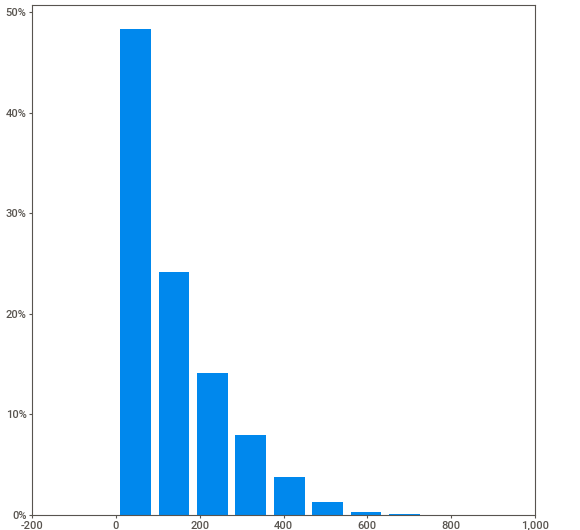
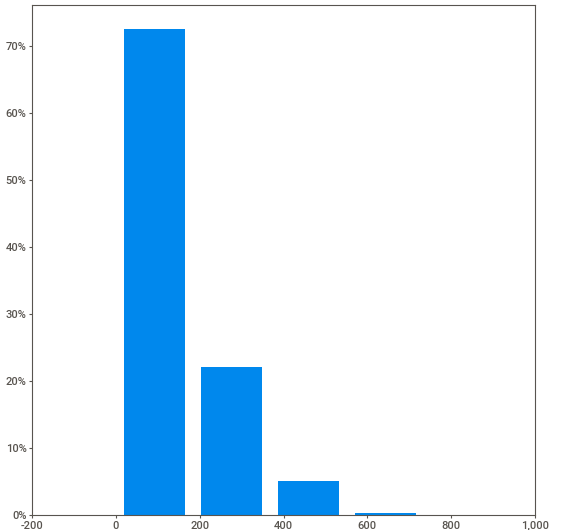
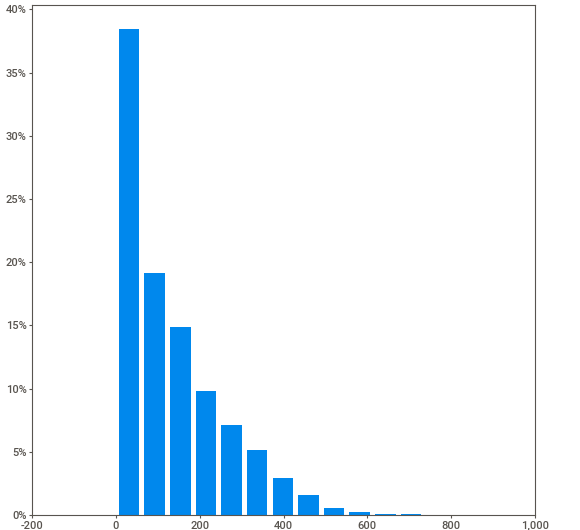
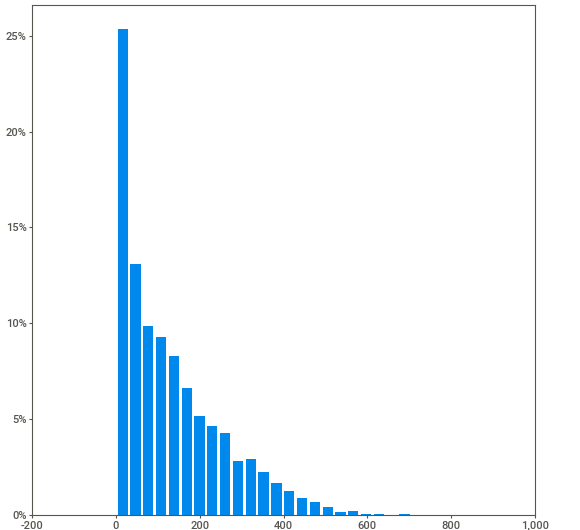
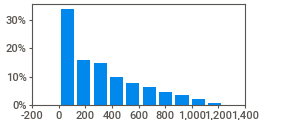
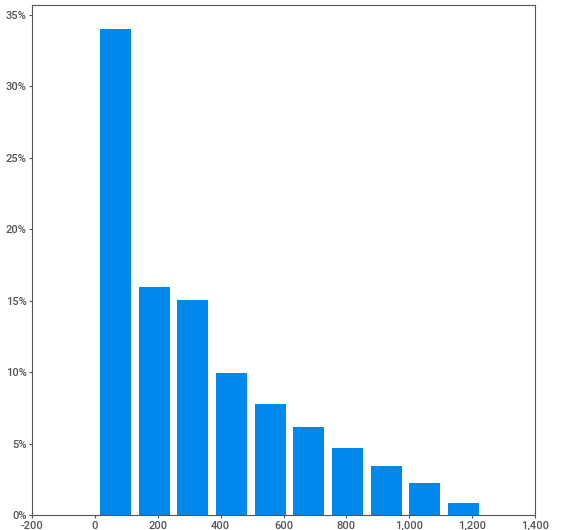
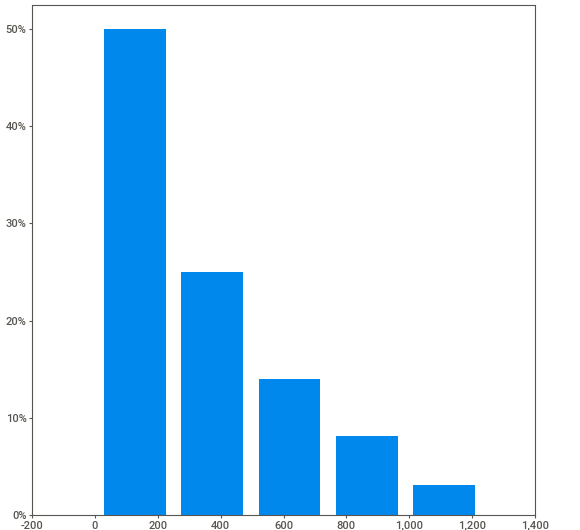
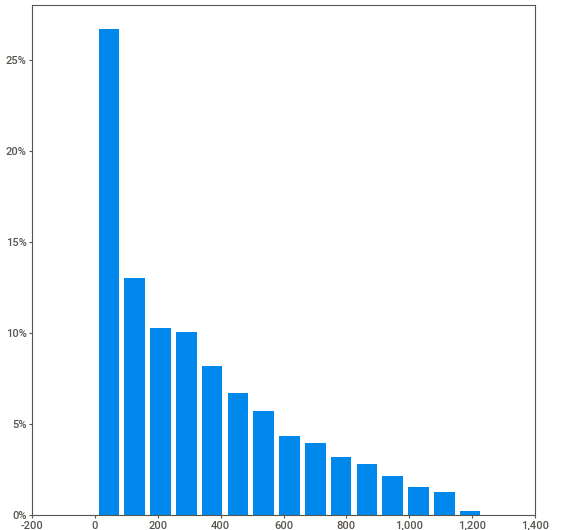
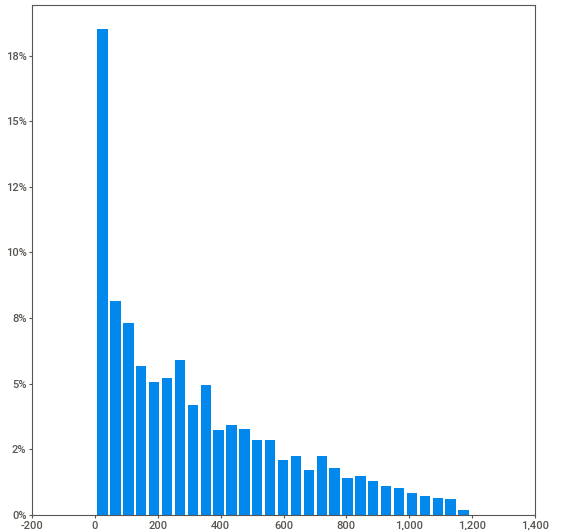
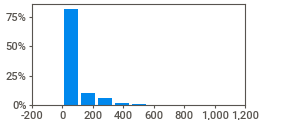
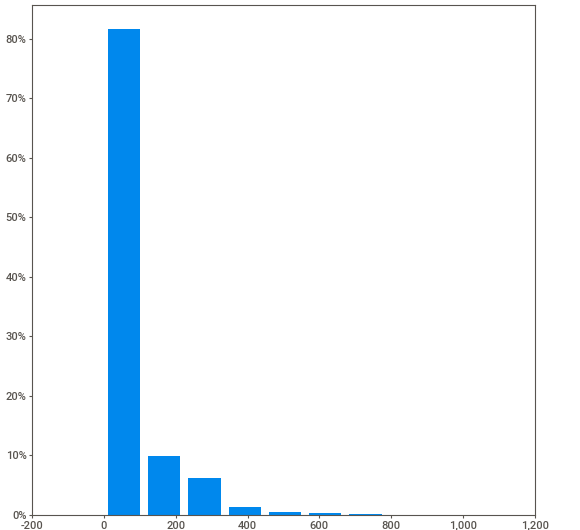
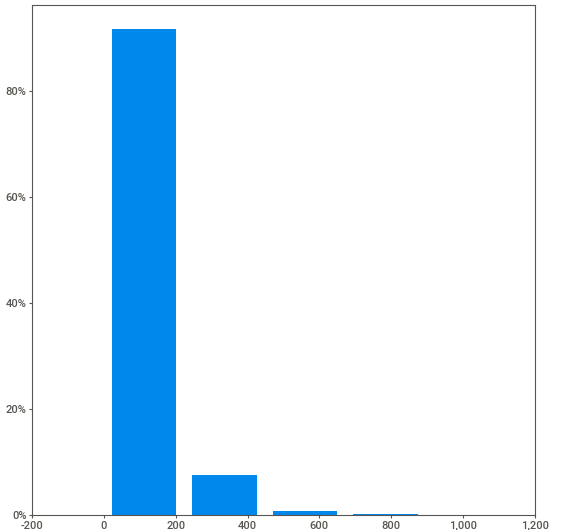
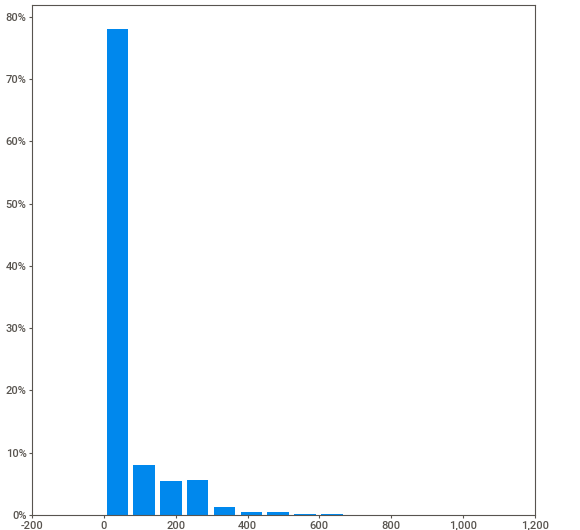
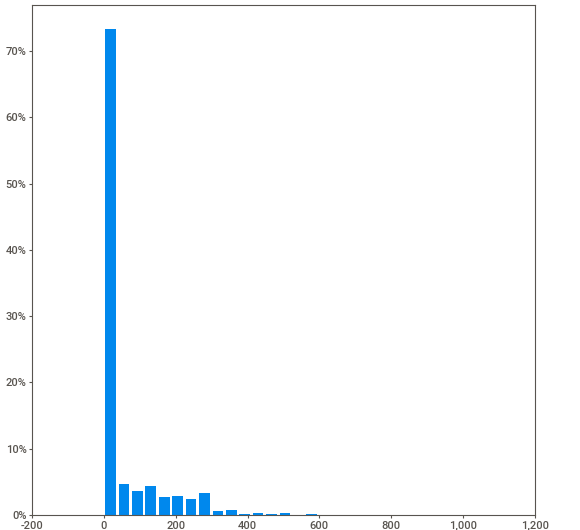
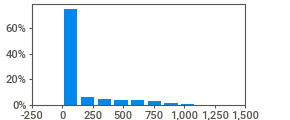
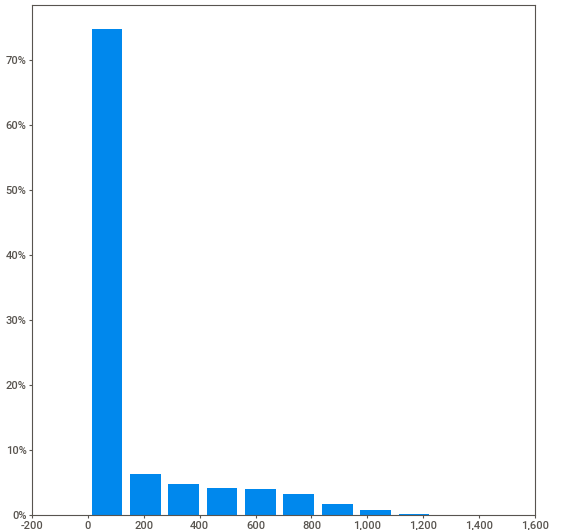
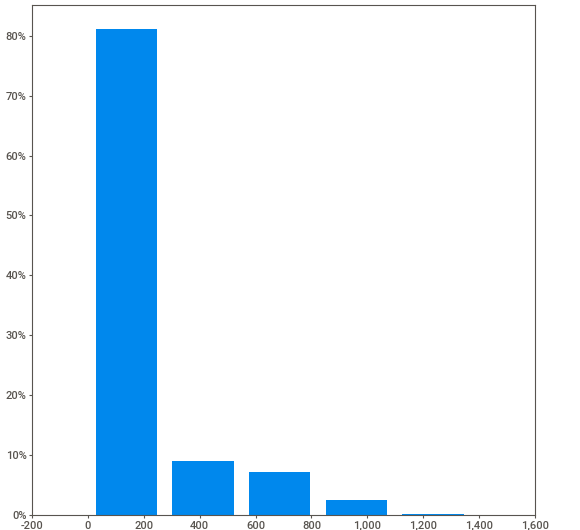
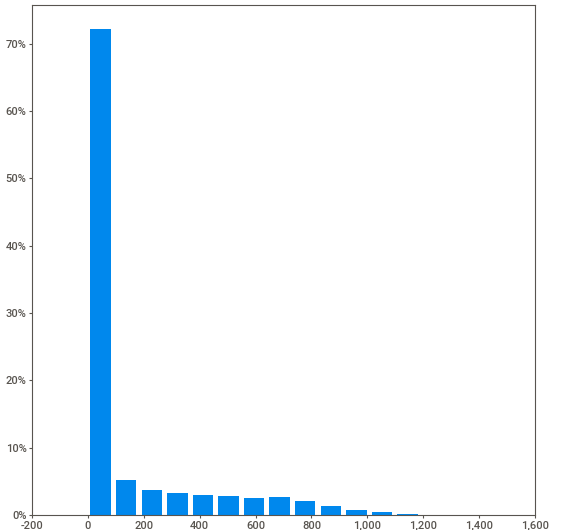
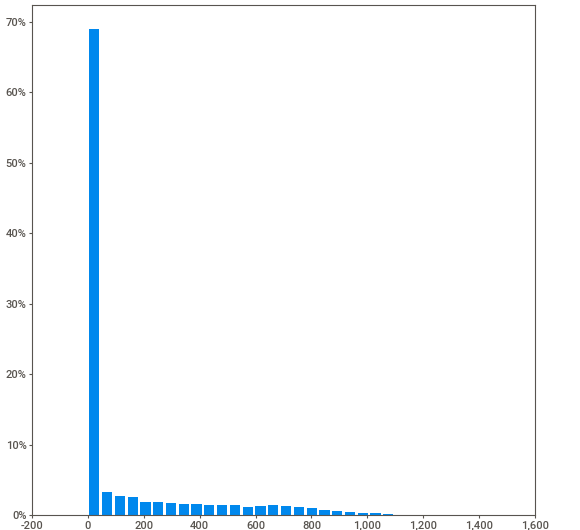
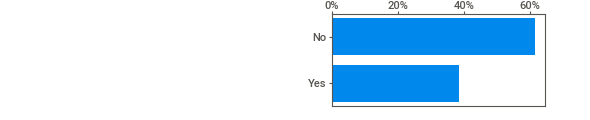
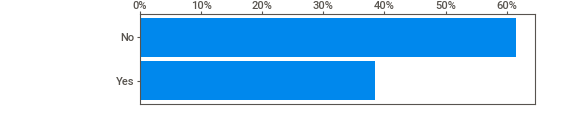
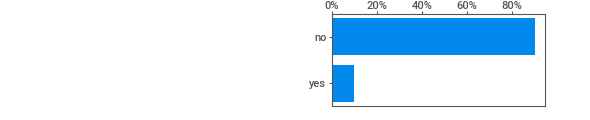
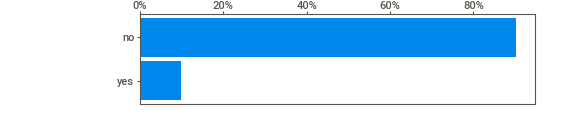
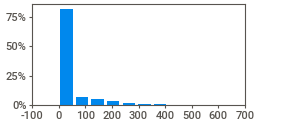
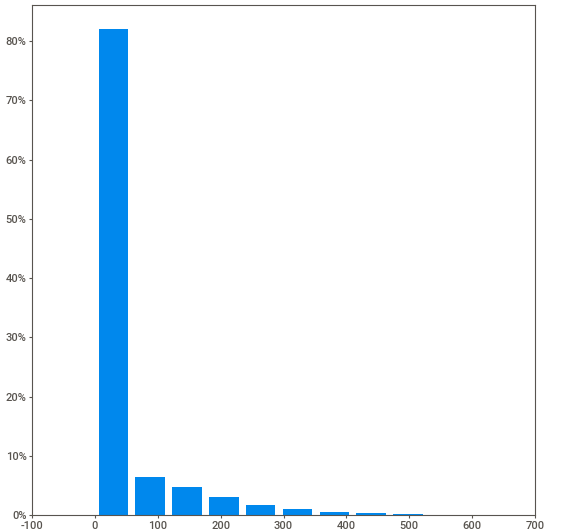
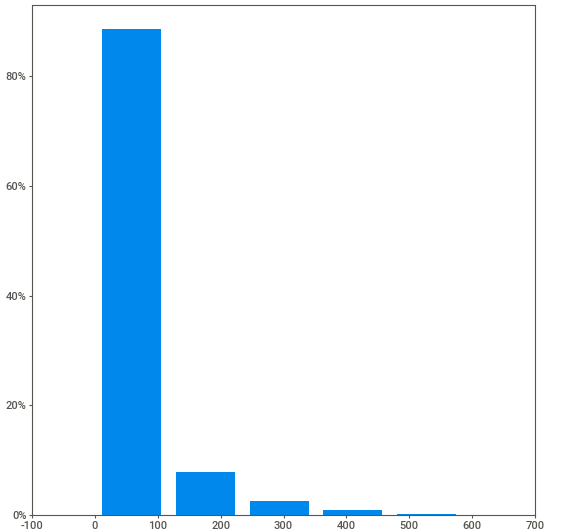
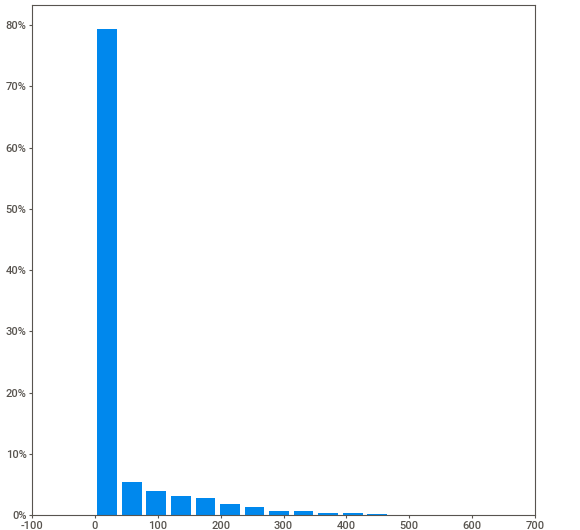
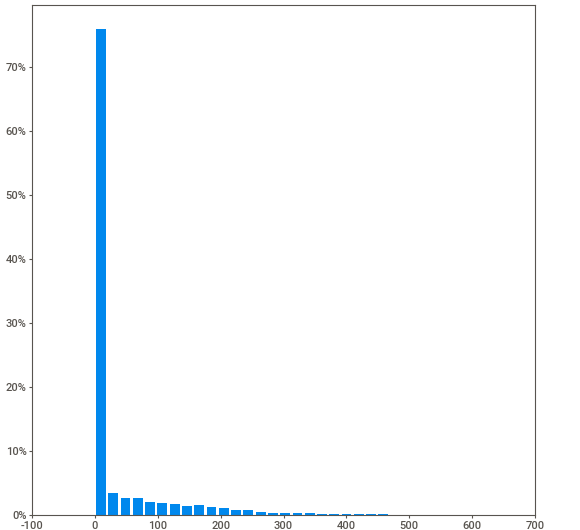
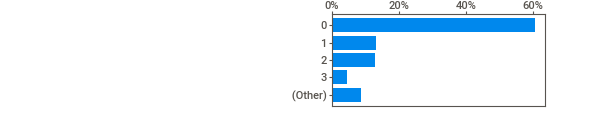
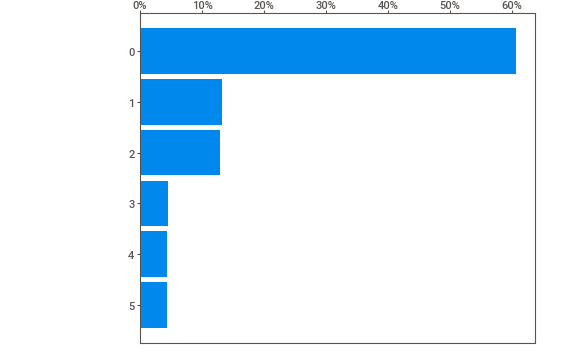
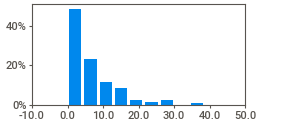
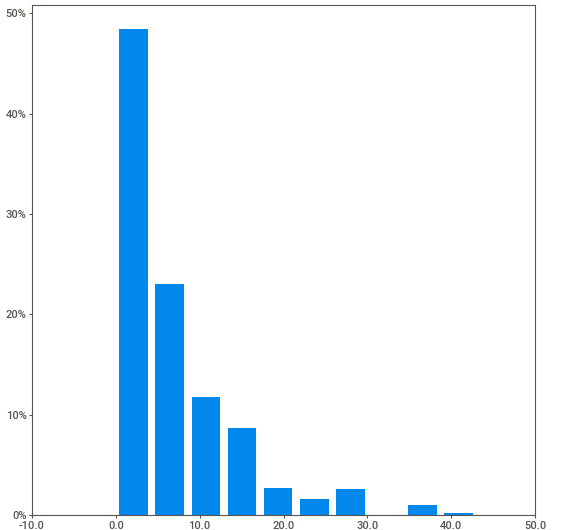
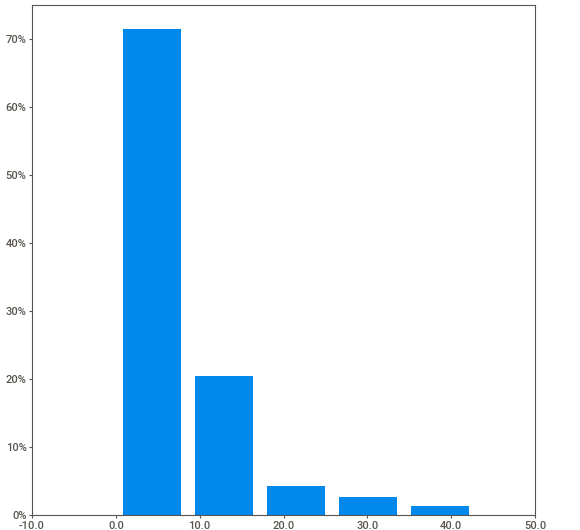
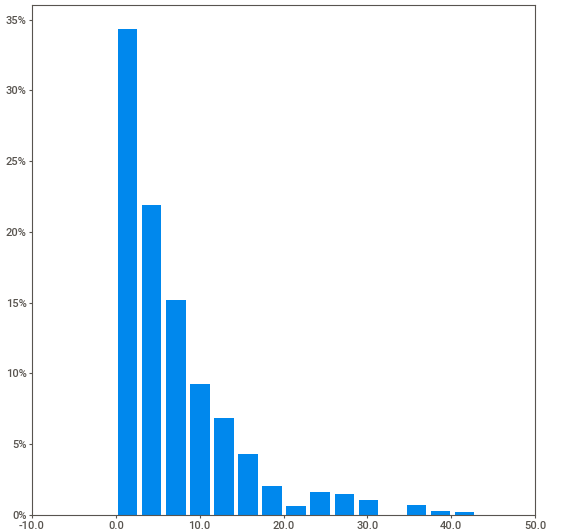
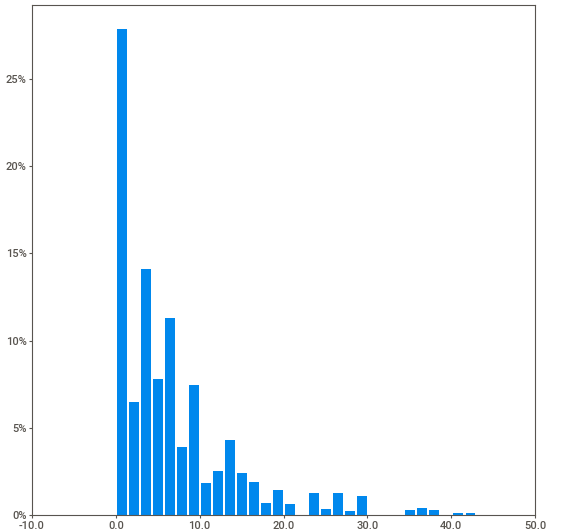
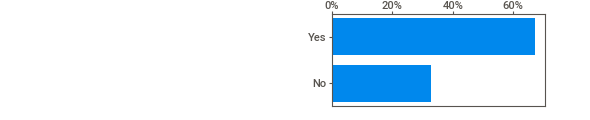
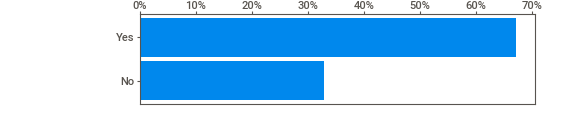
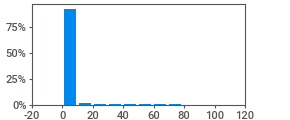
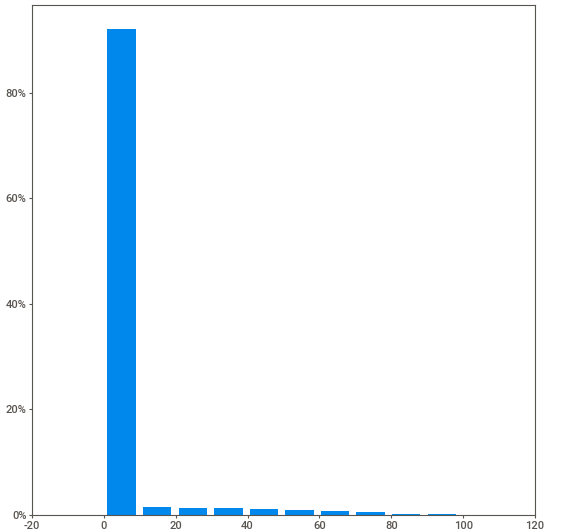
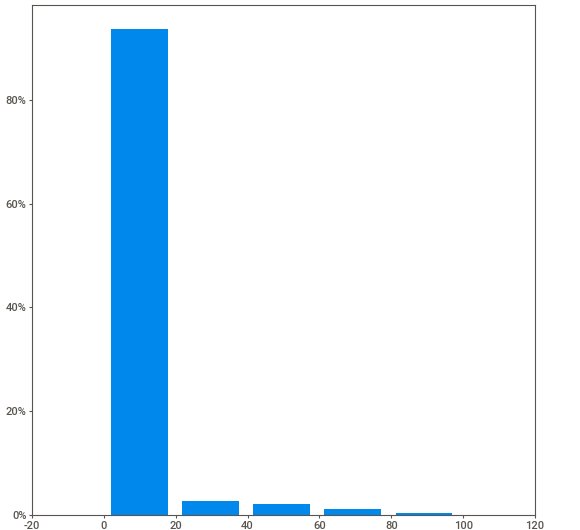
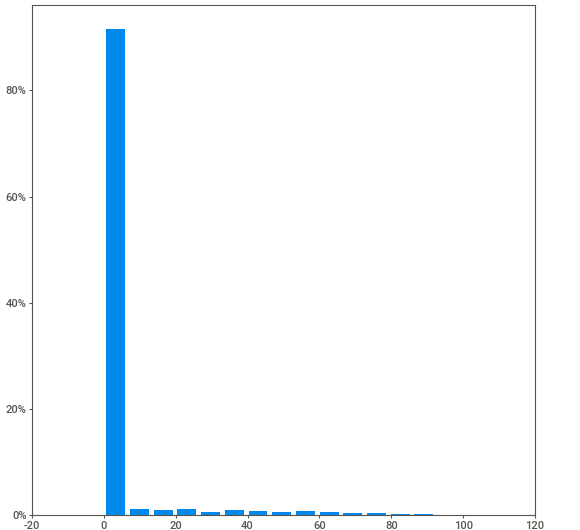
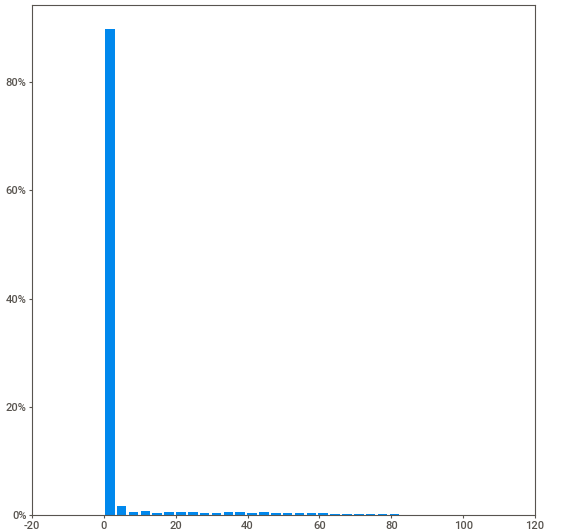
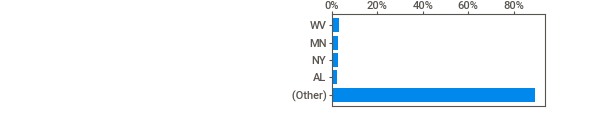
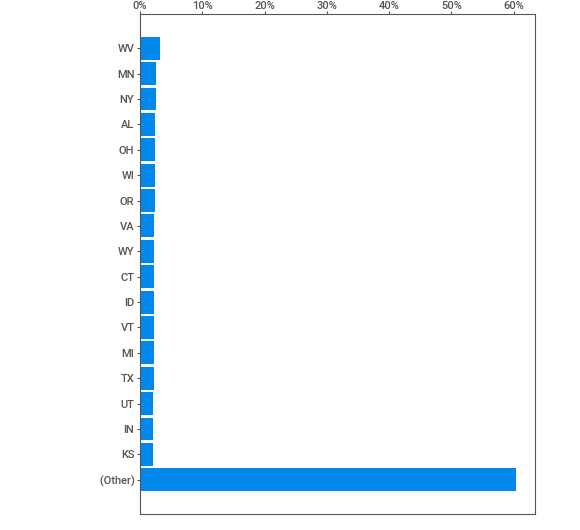
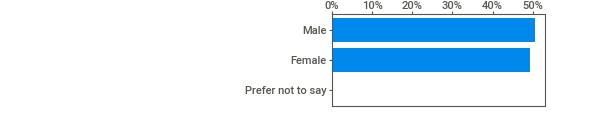
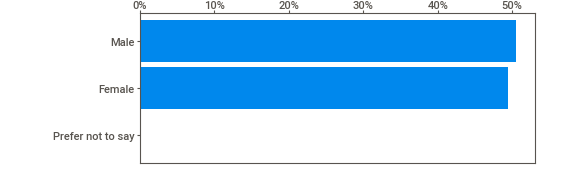
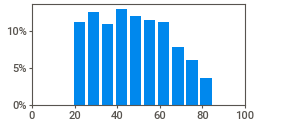
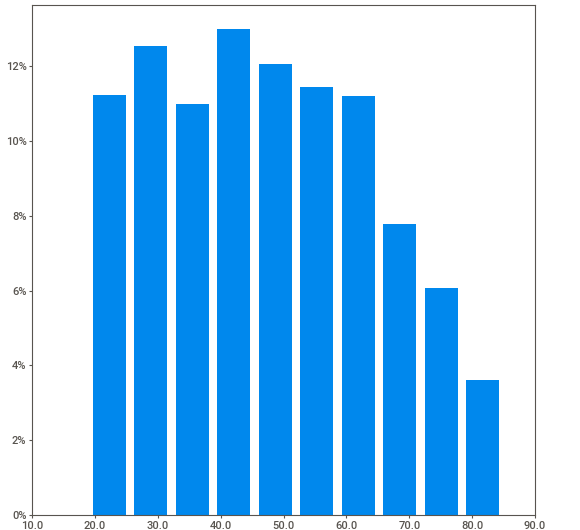
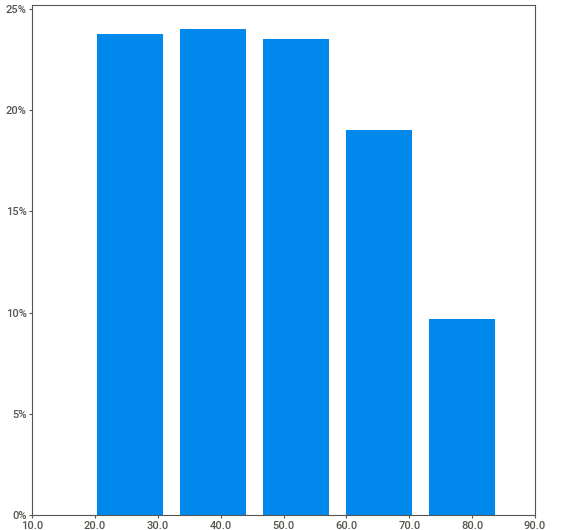
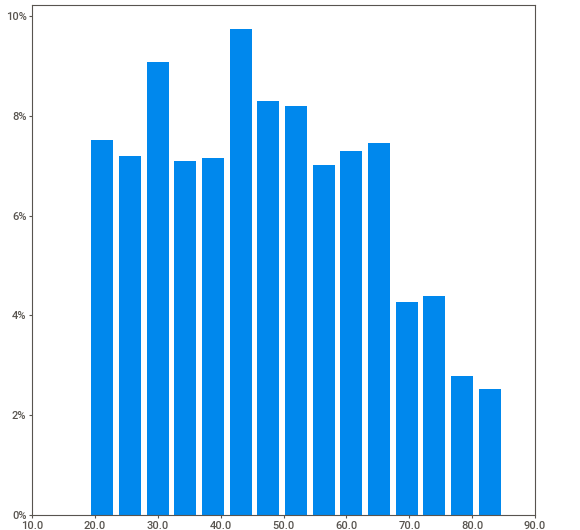
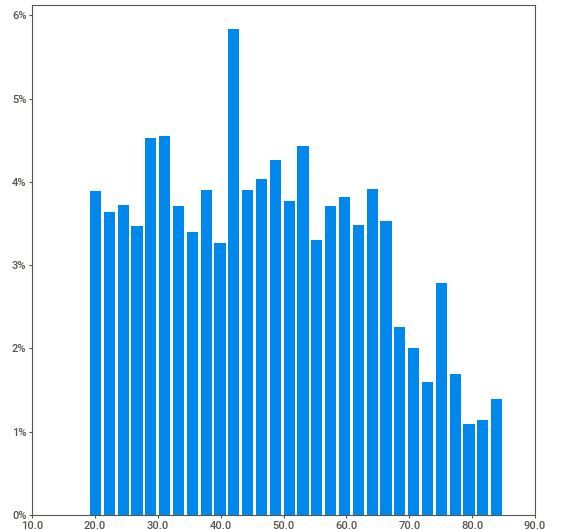
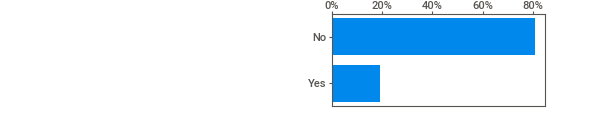
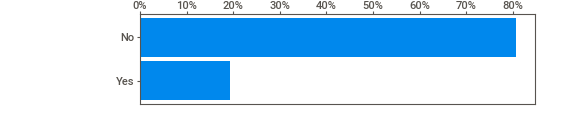
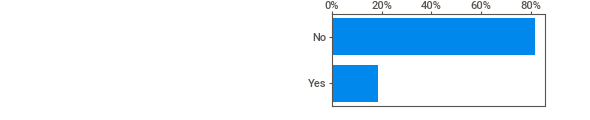
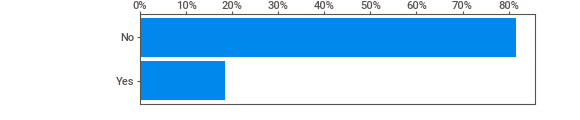
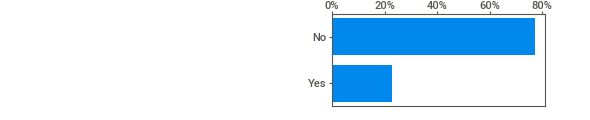
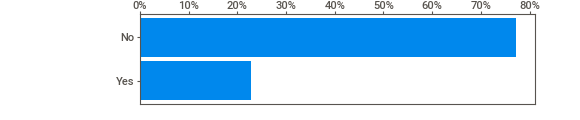
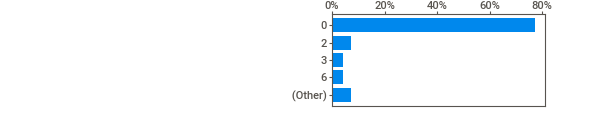
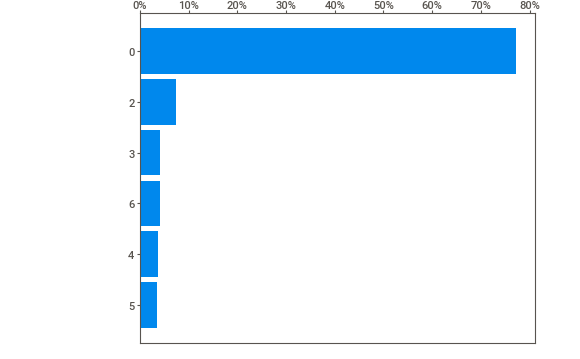
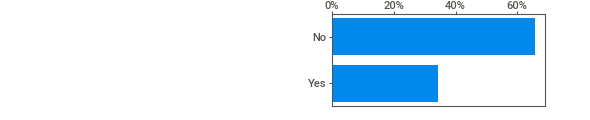
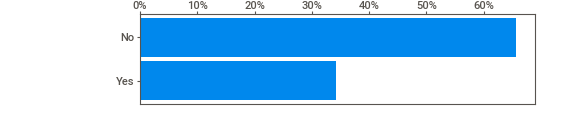
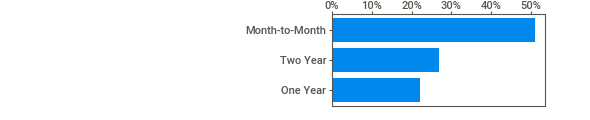
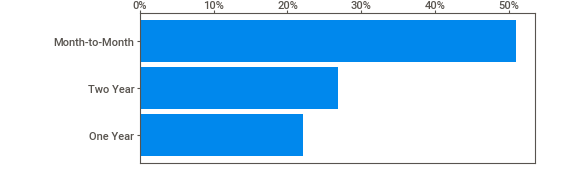
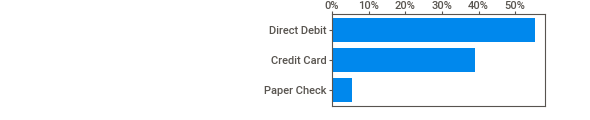
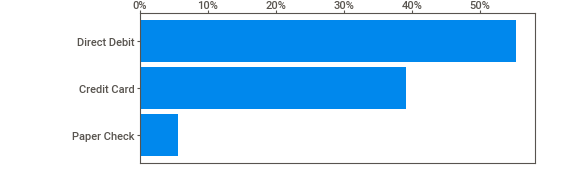
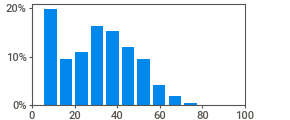
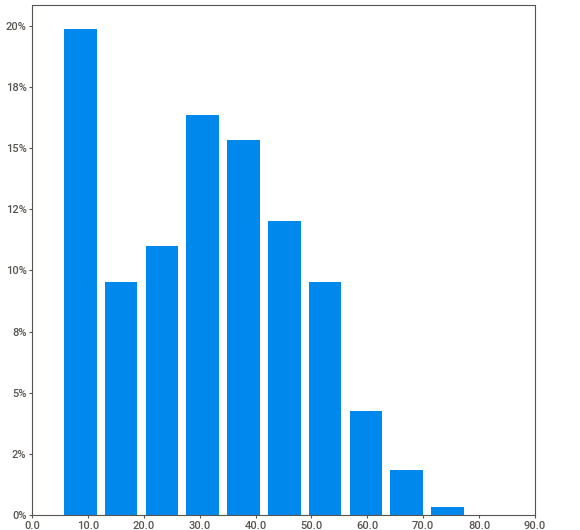
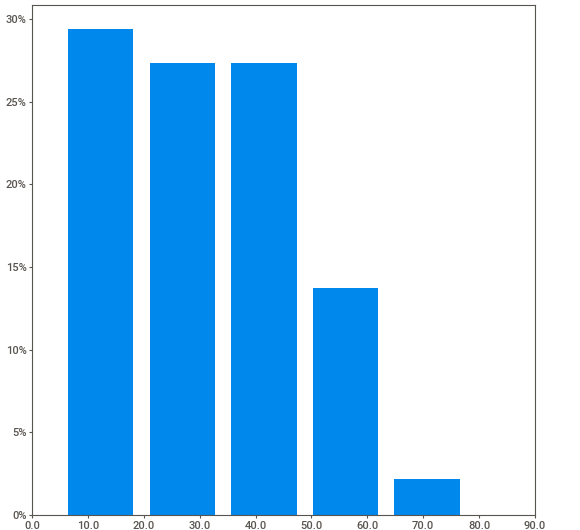
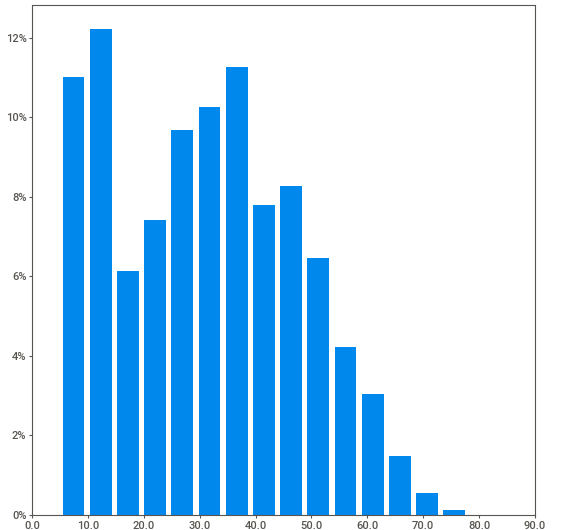
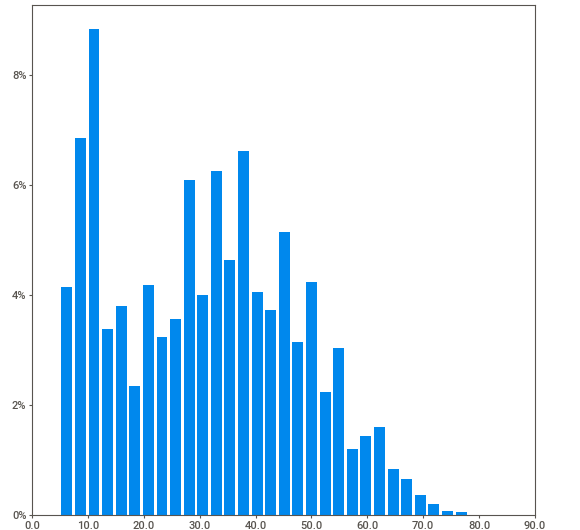
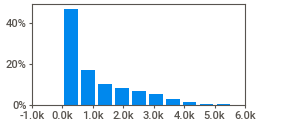
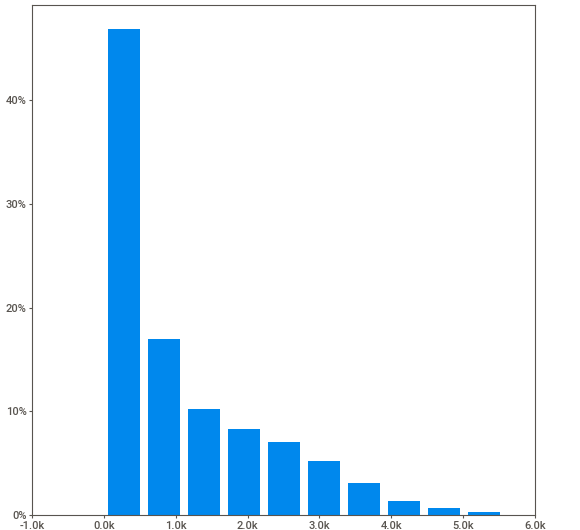
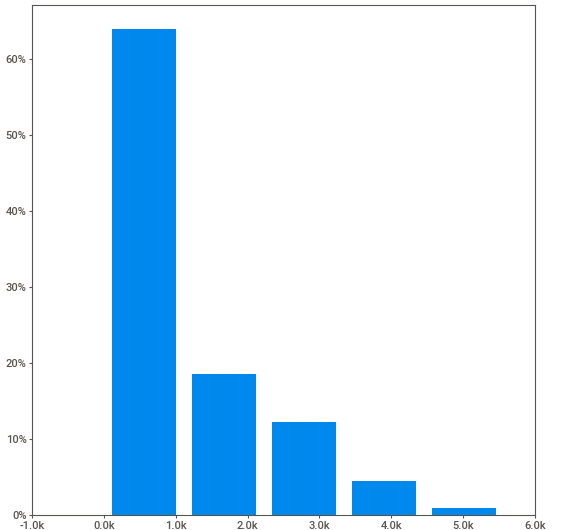
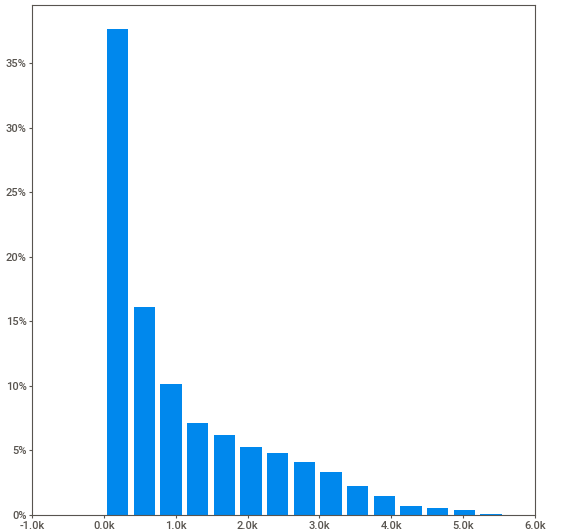
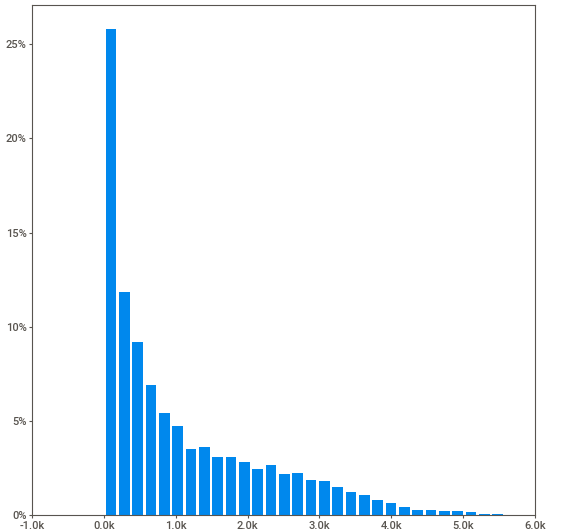

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
time: 7.75 s (started: 2024-02-16 20:44:11 +00:00)


In [13]:
# Sweetviz is a Python library used for visualizing and comparing datasets with ease. It generates high-density visualizations to help users understand the structure and nature of their data quickly. 
# Sweetviz can create visualizations for both numerical and categorical data, including correlations, distributions, and missing values analysis. It offers comparative analysis between datasets, making it useful 
# for exploratory data analysis (EDA) and for gaining insights into data characteristics before diving into machine learning or statistical analysis tasks.

import sweetviz as sv 

# Pairwise feature analysis involves comparing each feature in the dataset against every other feature to identify potential 
# relationships and correlations between them. 'Off' can be useful if you have a large dataset with many features, as pairwise analysis can be computationally intensive 
# and may take longer to generate the analysis report
report = sv.analyze(df, pairwise_analysis='off')  

# displays the sweetviz info in the notebook cell below 
report.show_notebook()

# displays the sweetviz info in the web browser and saves it as a .html file in your cwd
report.show_html("report.html")

In [14]:
# binary balance helper

def binary_balance(target_train, target_test, plot_dist=True):
    '''
    Plot distribution of binary target
    '''
    if plot_dist:
        fig, axs = plt.subplots(ncols=2, figsize=(17, 5), sharey=True)
        target_train.value_counts(normalize = True).plot(kind="bar", ax=axs[0])
        axs[0].set_title("Training Set Distribution")
        axs[0].set_xticklabels(target_train.unique(),rotation=70)
        target_test.value_counts(normalize=True).plot(kind="bar", ax=axs[1])
        axs[1].set_title("Test Set Distribution")
        axs[1].set_xticklabels(target_test.unique(), rotation=70)
        plt.show()

time: 0 ns (started: 2024-02-16 20:44:19 +00:00)


# 2. Data Ingestion

In [15]:
file = 'synthetic_churn.csv'

drop_cols = ['Customer ID', 'State', 'Phone Number']
usecols = [col for col in pd.read_csv(file, nrows=1).columns if col not in drop_cols]

df_churn = pd.read_csv(file, usecols=usecols)

df_churn.head()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,No,1,3,8.0,0.0,0.0,No,no,0.0,0,...,35,No,No,No,0,No,Month-to-Month,Direct Debit,10,10
1,No,33,179,431.3,0.0,0.0,No,no,0.0,0,...,49,No,No,No,0,Yes,One Year,Paper Check,21,703
2,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,...,51,No,No,No,0,Yes,One Year,Direct Debit,23,1014
3,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,...,41,No,No,No,0,No,Month-to-Month,Paper Check,17,177
4,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,...,51,No,No,No,0,No,One Year,Direct Debit,28,1720


time: 78 ms (started: 2024-02-16 20:44:19 +00:00)


In [16]:
# check transpose
df_churn.T

,0,1,2,3,4,5,6,7,8,9,...,6677,6678,6679,6680,6681,6682,6683,6684,6685,6686
Churn Label,No,No,No,No,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Account Length (in months),1,33,44,10,62,17,57,25,70,50,...,36,11,22,1,1,3,1,6,3,1
Local Calls,3,179,82,47,184,68,428,54,171,206,...,57,67,89,7,4,6,7,20,6,7
Local Mins,8.0,431.3,217.6,111.6,621.2,120.7,849.2,203.7,627.4,445.8,...,144.2,161.8,285.7,13.0,12.0,16.8,15.0,46.9,15.4,15.0
Intl Calls,0.0,0.0,0.0,60.0,310.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Intl Mins,0.0,0.0,0.0,71.0,694.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Intl Active,No,No,No,Yes,Yes,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
Intl Plan,no,no,yes,yes,yes,no,no,no,no,no,...,no,yes,no,no,no,no,no,no,no,no
Extra International Charges,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Customer Service Calls,0,0,0,0,0,0,0,0,0,0,...,0,2,4,1,1,0,5,4,2,1


time: 62 ms (started: 2024-02-16 20:44:19 +00:00)


In [17]:
# check info
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Churn Label                        6687 non-null   object 
 1   Account Length (in months)         6687 non-null   int64  
 2   Local Calls                        6687 non-null   int64  
 3   Local Mins                         6687 non-null   float64
 4   Intl Calls                         6687 non-null   float64
 5   Intl Mins                          6687 non-null   float64
 6   Intl Active                        6687 non-null   object 
 7   Intl Plan                          6687 non-null   object 
 8   Extra International Charges        6687 non-null   float64
 9   Customer Service Calls             6687 non-null   int64  
 10  Avg Monthly GB Download            6687 non-null   int64  
 11  Unlimited Data Plan                6687 non-null   objec

| Column Name                          | Possible Encoding                 |
| ----------------------------------- | ------------------------------------ |
| Churn Label                          | Binary Encoding (1 for yes, 0 for no) |
| Intl Active                          | Binary Encoding (1 for yes, 0 for no) |
| Intl Plan                            | Binary Encoding (1 for yes, 0 for no) |
| Unlimited Data Plan                  | Binary Encoding (1 for yes, 0 for no) |
| Gender                               | Binary Encoding (0 for male, 1 for female) |
| Under 30                             | Binary Encoding (1 for yes, 0 for no) |
| Senior                               | Binary Encoding (1 for yes, 0 for no) |
| Group                                | One-Hot Encoding                      |
| Device Protection & Online Backup    | Binary Encoding (1 for yes, 0 for no) |
| Contract Type                        | Ordinal Encoding                      |
| Payment Method                       | One-Hot Encoding                      |


**Why you should transform the columns after train-test split:**

* You want to avoid data leakage from the test set into the training set.

* Transforming the columns before train-test split may introduce information from the test set into the training set, leading to overfitting and poor model performance.

* Splitting the data into training and testing sets first ensures that the test set remains completely separate from the training set.

* Transforming the training set only ensures that the model is only trained on information that is present in the training set.

* Applying the same transformations to the test set ensures that the model is evaluated on data that it has not seen before.

* Performing transformations after train-test split helps ensure the model is trained and evaluated in an unbiased manner.

**In summary, performing transformations before train-test split can lead to data leakage and biased model performance, while performing transformations after train-test split helps ensure the model is trained and evaluated in an unbiased manner.**

In [18]:
# train_test_split
from sklearn.model_selection import train_test_split

# split into train test
df_train, df_test = train_test_split(df_churn, test_size=0.3,
                                                    random_state=1234,
                                                    stratify=df_churn['Churn Label'])

time: 204 ms (started: 2024-02-16 20:44:56 +00:00)


In [19]:
# check df_train
print(df_train.shape)
print(df_test.shape)

df_train.head()

(4680, 24)
(2007, 24)


,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Age,Under 30,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
6484,No,47,205,377.0,0.0,0.0,No,no,0.0,0,...,42,No,No,Yes,5,No,Month-to-Month,Direct Debit,27,1267
6432,No,66,412,854.0,0.0,0.0,No,no,0.0,0,...,71,No,Yes,Yes,2,Yes,One Year,Direct Debit,28,1871
3651,Yes,44,79,265.9,0.0,0.0,No,no,13.8,3,...,69,No,Yes,No,0,Yes,One Year,Direct Debit,46,2057
5199,No,37,218,521.5,0.0,0.0,No,no,0.0,0,...,36,No,No,Yes,2,No,Two Year,Credit Card,7,258
6545,No,58,105,404.7,0.0,0.0,No,no,0.0,0,...,48,No,No,Yes,6,Yes,Two Year,Direct Debit,25,1429


time: 31 ms (started: 2024-02-16 20:45:04 +00:00)


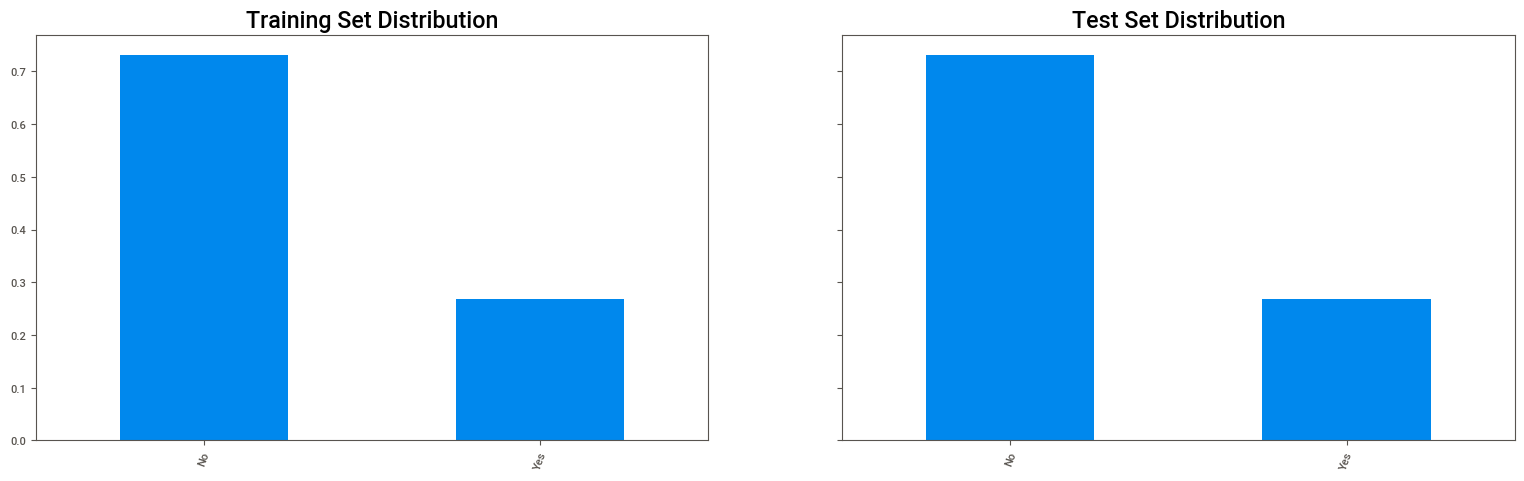

time: 516 ms (started: 2024-02-16 20:45:59 +00:00)


In [20]:
# check binary balance

binary_balance(df_train['Churn Label'], df_test['Churn Label'], plot_dist=True)

In [21]:
# ordinal encode contract
print(df_train.columns)
print(df_train['Contract Type'].unique())

Index(['Churn Label', 'Account Length (in months)', 'Local Calls',
       'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active', 'Intl Plan',
       'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges'],
      dtype='object')
['Month-to-Month' 'One Year' 'Two Year']
time: 0 ns (started: 2024-02-16 20:46:03 +00:00)


In [22]:
# create copies to not overwrite original
df_train_enc = df_train.copy()
df_test_enc = df_test.copy()

time: 0 ns (started: 2024-02-16 20:46:09 +00:00)


In [23]:
# encode ordinal: parental level of education
from sklearn.preprocessing import OrdinalEncoder
c = "Contract Type"
cat = ['Month-to-Month','One Year','Two Year']
ordinalEnc = OrdinalEncoder(categories=[cat]).fit(df_train[[c]])
df_train_enc[c] = ordinalEnc.transform(df_train[[c]])
df_test_enc[c] = ordinalEnc.transform(df_test[[c]])

time: 0 ns (started: 2024-02-16 20:46:12 +00:00)


In [24]:
# check encoding
display(df_train[[c]].head(5))
display(df_train_enc[[c]].head(5))

,Contract Type
6484,Month-to-Month
6432,One Year
3651,One Year
5199,Two Year
6545,Two Year


,Contract Type
6484,0.0
6432,1.0
3651,1.0
5199,2.0
6545,2.0


time: 16 ms (started: 2024-02-16 20:46:14 +00:00)


In [25]:
# one-hot encode the rest for simplicity sake
one_hot_cols = [col for col in df_train.select_dtypes(include=['object'])
                if col not in ['Contract Type', 'Churn Label']]

print(one_hot_cols)

['Intl Active', 'Intl Plan', 'Unlimited Data Plan', 'Gender', 'Under 30', 'Senior', 'Group', 'Device Protection & Online Backup', 'Payment Method']
time: 0 ns (started: 2024-02-16 20:46:18 +00:00)


In [26]:
# apply one-hot encoding to them
from sklearn.preprocessing import OneHotEncoder


def one_hot_encode_categorical(df_train, df_test, one_hot_cols):
    for col in one_hot_cols:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first').fit(df_train[[col]])
        ohe_cols_train = pd.DataFrame(ohe.transform(df_train[[col]]),
                                       columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]],
                                      index=df_train.index)
        ohe_cols_test = pd.DataFrame(ohe.transform(df_test[[col]]),
                                      columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]],
                                     index=df_test.index)
        df_train = pd.concat([df_train, ohe_cols_train], axis=1).drop(columns=col)
        df_test = pd.concat([df_test, ohe_cols_test], axis=1).drop(columns=col)
    return df_train, df_test

time: 0 ns (started: 2024-02-16 20:46:21 +00:00)


In [27]:
# implement
df_train_enc, df_test_enc = one_hot_encode_categorical(df_train_enc, df_test_enc,
                                                       one_hot_cols)

time: 109 ms (started: 2024-02-16 20:46:26 +00:00)


In [28]:
# check results
display(df_train[one_hot_cols].head(5))
display(df_train_enc.head(5))

,Intl Active,Intl Plan,Unlimited Data Plan,Gender,Under 30,Senior,Group,Device Protection & Online Backup,Payment Method
6484,No,no,Yes,Male,No,No,Yes,No,Direct Debit
6432,No,no,Yes,Female,No,Yes,Yes,Yes,Direct Debit
3651,No,no,Yes,Female,No,Yes,No,Yes,Direct Debit
5199,No,no,No,Female,No,No,Yes,No,Credit Card
6545,No,no,Yes,Male,No,No,Yes,Yes,Direct Debit


,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,...,Intl Plan_yes,Unlimited Data Plan_Yes,Gender_Male,Gender_Prefer not to say,Under 30_Yes,Senior_Yes,Group_Yes,Device Protection & Online Backup_Yes,Payment Method_Direct Debit,Payment Method_Paper Check
6484,No,47,205,377.0,0.0,0.0,0.0,0,8,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6432,No,66,412,854.0,0.0,0.0,0.0,0,10,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3651,Yes,44,79,265.9,0.0,0.0,13.8,3,10,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5199,No,37,218,521.5,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6545,No,58,105,404.7,0.0,0.0,0.0,0,4,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


time: 31 ms (started: 2024-02-16 20:46:29 +00:00)


# 3. Exploratory Data Analysis

![picture](https://drive.google.com/uc?id=1dl0AIfvwtPfYwpgFFwAE6oUrHEjkyOmo)

## Exploratory Data Analysis - EDA

### Auto EDA

In [29]:
# sweetviz / pandas profiler
import sweetviz as sv


#Report = sv.analyze(df_train)

#Report.show_notebook()

time: 0 ns (started: 2024-02-16 20:46:42 +00:00)


### Manual EDA

#### Coding Styles - OOP Style & PLT Interface

markdown table with Plot type & acceptable data inputs in brackets, oop variant template, plt interface template

| Plot Type           | Acceptable Data Input         | OOP Variant Template                        | plt Interface Template              |
|---------------------|-------------------------------|---------------------------------------------|-------------------------------------|
| Line Plot           | x: List, y: List              | ax.plot(x, y)                                | plt.plot(x, y)                      |
| Scatter Plot        | x: List, y: List              | ax.scatter(x, y)                            | plt.scatter(x, y)                  |
| Bar Plot            | x: List, y: List              | ax.bar(x, y)                                | plt.bar(x, y)                       |
| Horizontal Bar Plot | x: List, y: List              | ax.barh(y, x)                               | plt.barh(y, x)                      |
| Histogram           | x: List                        | ax.hist(x, bins=10)                         | plt.hist(x, bins=10)                |
| Pie Chart           | x: List                        | ax.pie(x, labels=labels, autopct='%1.1f%%') | plt.pie(x, labels=labels, autopct='%1.1f%%') |
| Box Plot            | x: List                        | ax.boxplot(x)                               | plt.boxplot(x)                      |
| Violin Plot         | x: List                        | ax.violinplot(x)                            | plt.violinplot(x)                   |
| 3D Scatter Plot     | x: List, y: List, z: List      | ax.scatter(x, y, z)                         | Axes3D(fig).scatter(x, y, z)        |
| 3D Surface Plot     | X: 2D array, Y: 2D array, Z: 2D array | ax.plot_surface(X, Y, Z)               | Axes3D(fig).plot_surface(X, Y, Z)   |


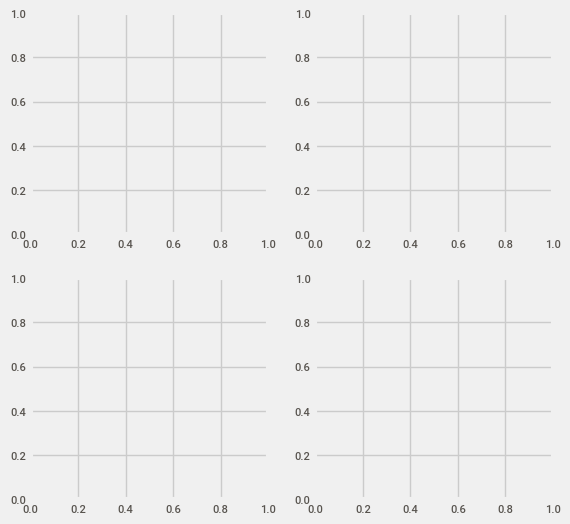

time: 344 ms (started: 2024-02-16 20:46:57 +00:00)


In [30]:
# width, height
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(2,2,figsize=(6,6))



In [31]:
# expand environment variable

os.environ['SKETCH_MAX_COLUMNS'] = '30'  # Set the maximum number of columns to 30


time: 0 ns (started: 2024-02-16 20:47:05 +00:00)


In [32]:
df_train.columns

Index(['Churn Label', 'Account Length (in months)', 'Local Calls',
       'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active', 'Intl Plan',
       'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges'],
      dtype='object')

time: 15 ms (started: 2024-02-16 20:47:08 +00:00)


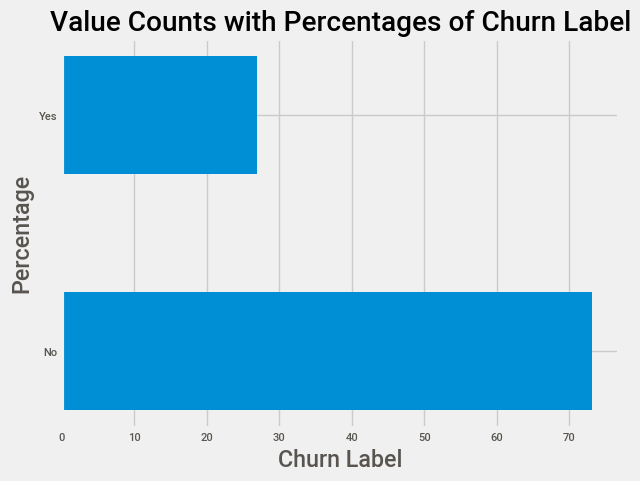

time: 109 ms (started: 2024-02-16 20:47:11 +00:00)


In [33]:
# Get the value counts of the Churn Label column
churn_counts = df_train['Churn Label'].value_counts()

# Calculate the percentages of each value count
churn_percentages = churn_counts / df_train.shape[0] * 100

# Plot the value counts and percentages in a bar chart
plt.barh(y=churn_counts.index, width=churn_percentages, height=0.5)
plt.xlabel('Churn Label')
plt.ylabel('Percentage')
plt.title('Value Counts with Percentages of Churn Label')
plt.show()

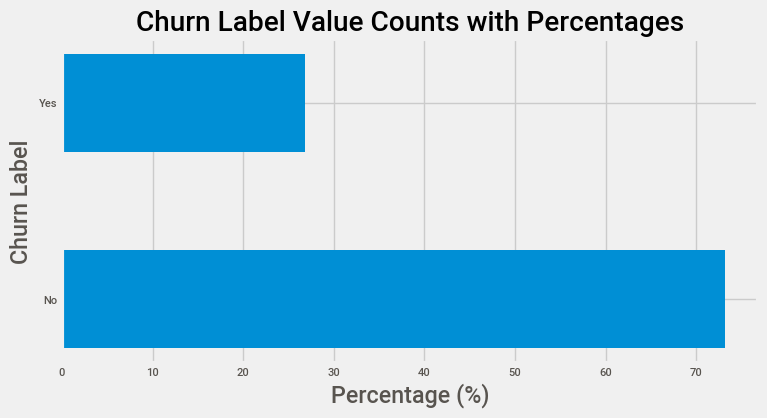

time: 125 ms (started: 2024-02-16 20:47:15 +00:00)


In [34]:
# OOP interface width, height
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(y=churn_counts.index, width=churn_percentages, height=0.5)

# titles
ax.set(xlabel='Percentage (%)', ylabel='Churn Label',
       title='Churn Label Value Counts with Percentages');

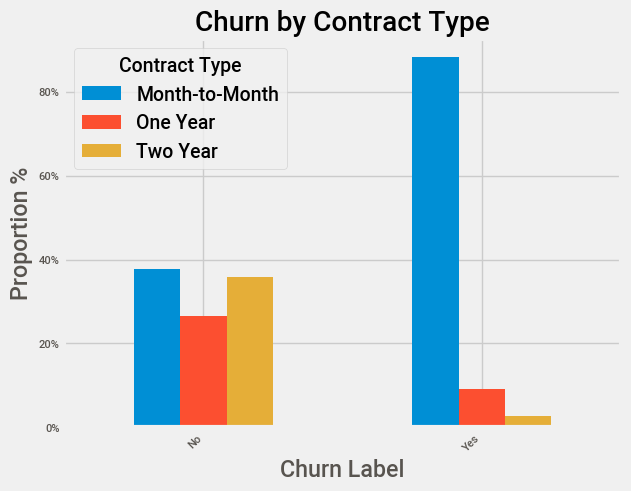

time: 172 ms (started: 2024-02-16 20:47:18 +00:00)


In [35]:
# multivariate
fig, ax = plt.subplots()

(df_train.groupby('Churn Label')['Contract Type']
 .value_counts(normalize=True)
 .unstack()
).plot(kind='bar', ax=ax)

ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.set(ylabel ='Proportion %', title='Churn by Contract Type')
plt.xticks(rotation=45, ha='right');

**Histogram Example**

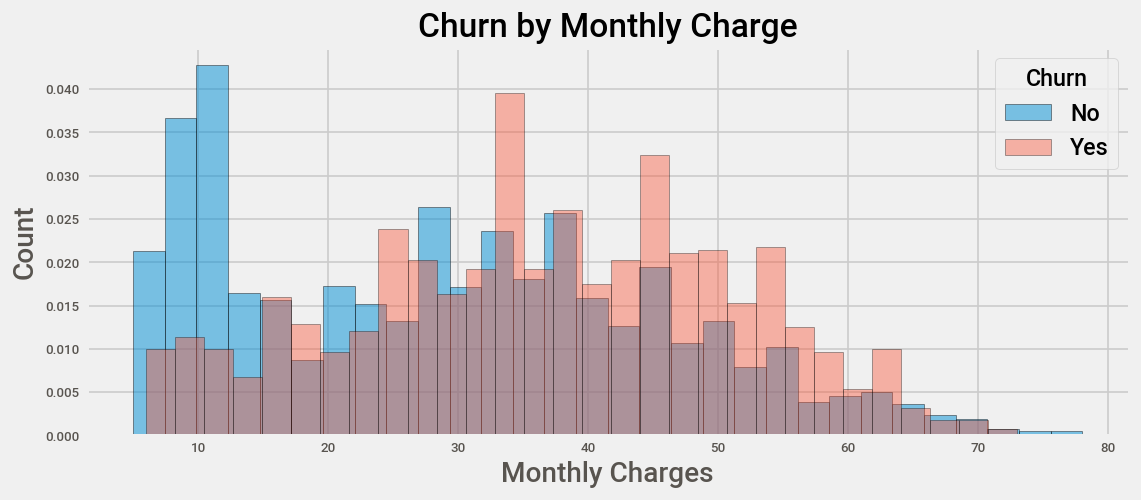

time: 313 ms (started: 2024-02-16 20:47:21 +00:00)


In [36]:
# Filter the data by Churn
churn_yes = df_train[df_train['Churn Label'] == 'Yes']['Monthly Charge']
churn_no = df_train[df_train['Churn Label'] == 'No']['Monthly Charge']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 4), dpi=120)

# Plot the histograms with density
ax.hist(x=churn_no, bins=30, alpha=0.5, edgecolor='black', label='No', density=True)
ax.hist(x=churn_yes, bins=30, alpha=0.4, edgecolor='black', label='Yes', density=True)
# the two arrays are stacked on one ax canvas


# Set labels and title using ax.set()
ax.set(xlabel='Monthly Charges', ylabel='Count', title='Churn by Monthly Charge')

# Add legend
ax.legend(title='Churn');

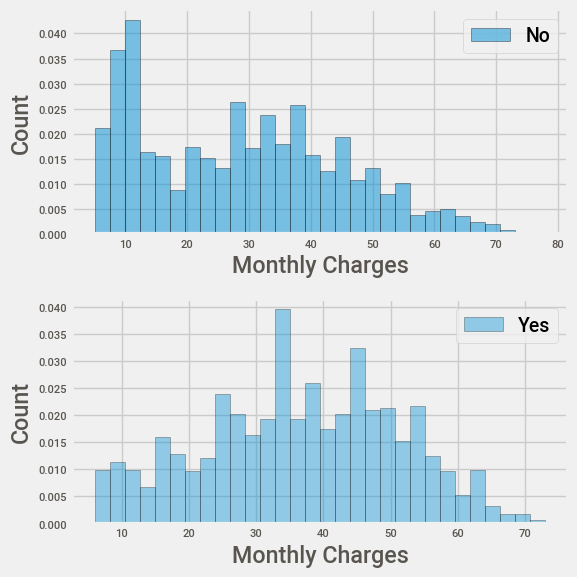

time: 360 ms (started: 2024-02-16 20:47:26 +00:00)


In [37]:
# two separate plots
fig, ax = plt.subplots(2, 1, figsize=(6,6))

churn_yes = df_train[df_train['Churn Label'] == 'Yes']['Monthly Charge']
churn_no = df_train[df_train['Churn Label'] == 'No']['Monthly Charge']

ax[0].hist(x=churn_no, bins=30, alpha=0.5, edgecolor='black', label='No', density=True)
ax[1].hist(x=churn_yes, bins=30, alpha=0.4, edgecolor='black', label='Yes', density=True)

ax[0].set(xlabel='Monthly Charges', ylabel='Count')
ax[1].set(xlabel='Monthly Charges', ylabel='Count')

ax[0].legend()
ax[1].legend()
plt.tight_layout()

#### Seaborn - Matplotlib Companion

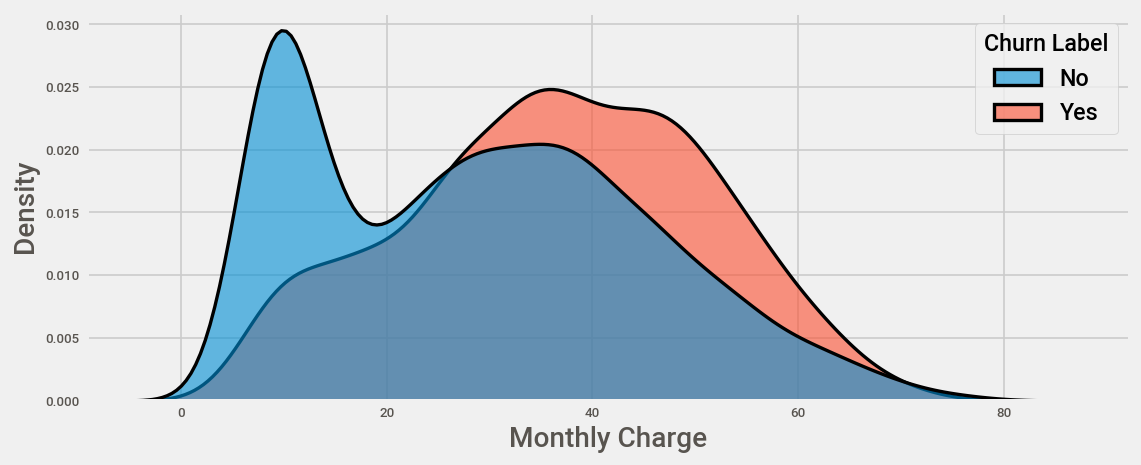

time: 219 ms (started: 2024-02-16 20:47:32 +00:00)


In [38]:
# Seaborn KDE plot
fig, g = plt.subplots(figsize=(10,4), dpi=120)

g = sns.kdeplot(data=df_train, x='Monthly Charge', hue='Churn Label',
                common_norm=False, ec='black', shade=True,
                alpha=0.6, lw=2, zorder=2);

**Seaborn distplot**

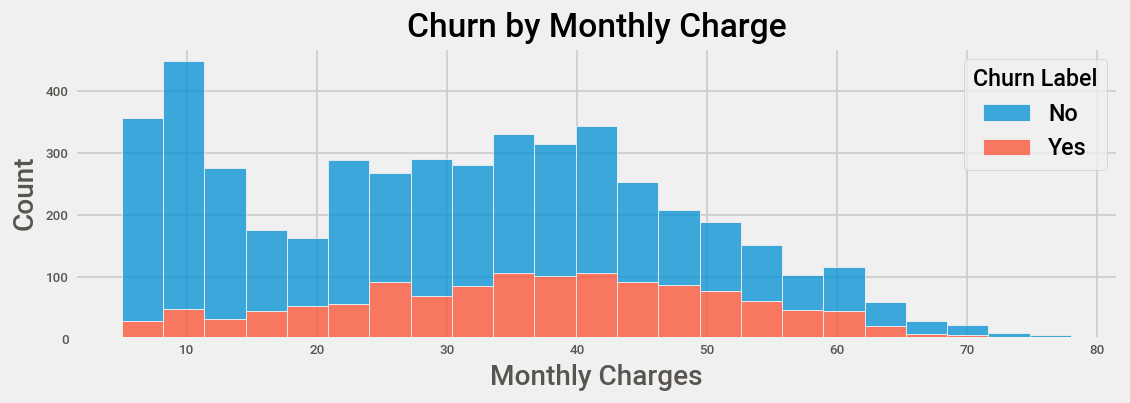

time: 250 ms (started: 2024-02-16 20:47:38 +00:00)


In [39]:
# histplot
fig, ax = plt.subplots(figsize=(10, 3), dpi=120)

# Plot the stacked histograms with density
sns.histplot(data=df_train, x="Monthly Charge",
             hue="Churn Label", multiple="stack", ax=ax)

# Set labels and title using ax.set()
ax.set(xlabel='Monthly Charges', ylabel='Count', title='Churn by Monthly Charge');

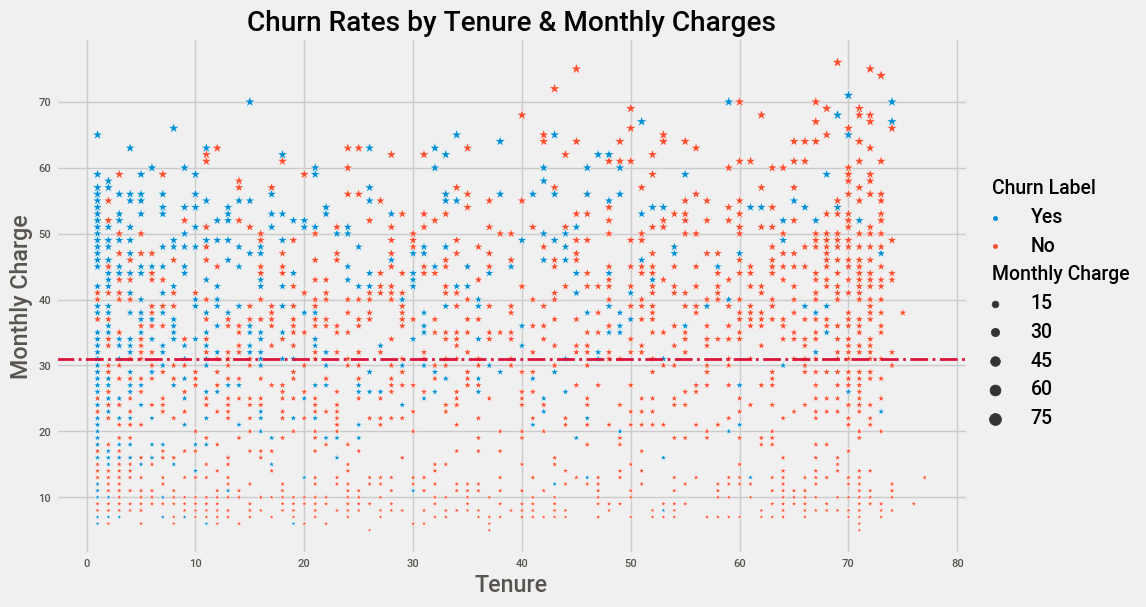

time: 625 ms (started: 2024-02-16 20:47:42 +00:00)


In [40]:
# multivariate - scatter
avg_monthly_charge = df_train['Monthly Charge'].mean()

ax = sns.relplot(x="Account Length (in months)", y="Monthly Charge",
                     data=df_train.sample(2100), marker= "*", size="Monthly Charge",
                 hue='Churn Label',sizes=(15, 75),kind='scatter', height=6, aspect=10/6)

ax.set(xlabel='Tenure', ylabel='Monthly Charge',
       title='Churn Rates by Tenure & Monthly Charges')

plt.axhline(y=avg_monthly_charge, linewidth=2, linestyle='-.', c='crimson');

**Findings**

1) We can see a cluster of churn customers in the top left quadrant: relatively new customers with high monthly charge.

2) There may be issues of better pricing elsewhere with similar levels of service.